In [48]:
import rpy2
import rpy2.robjects as robj
import rpy2.robjects.pandas2ri # for dataframe conversion
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [49]:
%%R
library(ggplot2)
library(dplyr)

In [110]:
%run titanic.py

In [111]:
%Rpush df

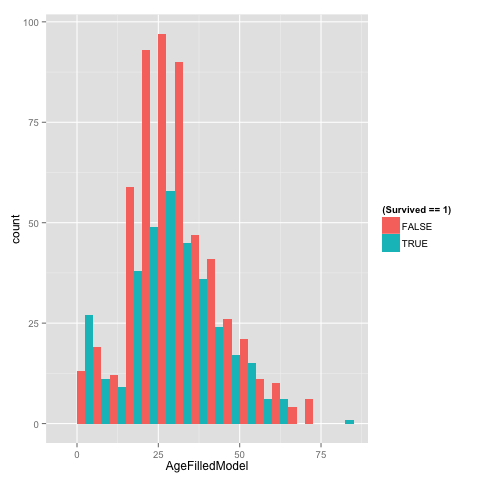

In [52]:
%%R 
ggplot(df, aes(AgeFilledModel, fill = (Survived == 1))) + geom_histogram(binwidth=5, position="dodge")

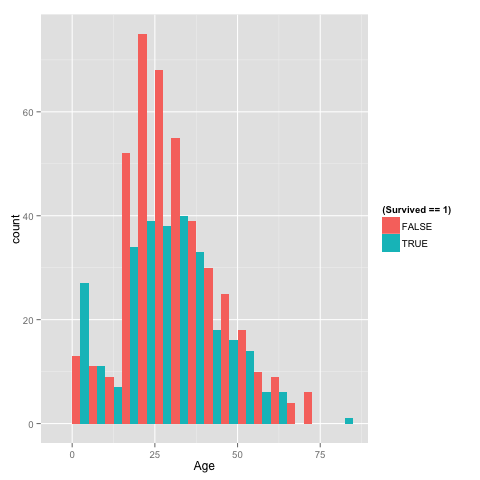

In [53]:
%%R 
ggplot(df, aes(Age, fill = (Survived == 1))) + geom_histogram(binwidth=5, position="dodge")

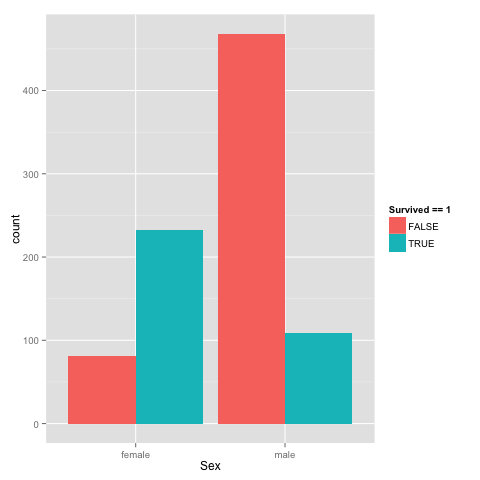

In [54]:
%%R 
ggplot(df, aes(Sex, fill=Survived == 1)) + geom_histogram(position = "dodge")

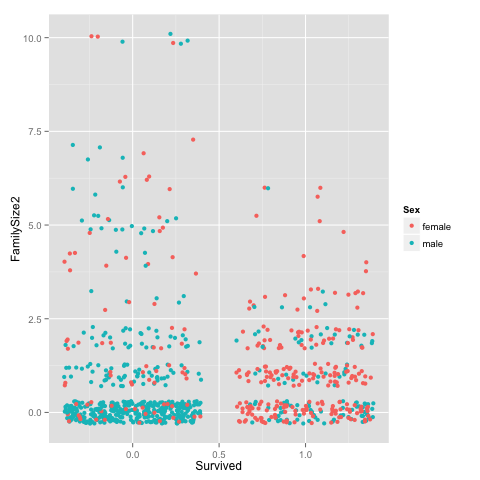

In [101]:
%%R 
ggplot(df, aes(Survived, FamilySize2, colour=Sex)) + geom_point(position=position_jitter(width=0.4,height=.3))

In [112]:
%%R 
ggplot(df, aes(Sex, AgeFilledMedianByTitle, colour=factor(Survived))) + geom_point(position=position_jitter(width=0.2,height=0))

/Users/maciej/anaconda/envs/python27/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : 
  object 'AgeFilledMedianByTitle' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


RRuntimeError: Error in eval(expr, envir, enclos) : 
  object 'AgeFilledMedianByTitle' not found


In [57]:
df[df['Age'].isnull()].groupby('Survived').size()

Survived
0    125
1     52
dtype: int64

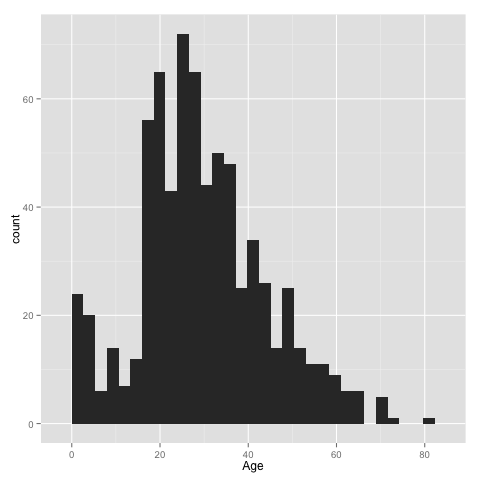

In [58]:
%%R
ggplot(df, aes(Age), ) + geom_histogram()

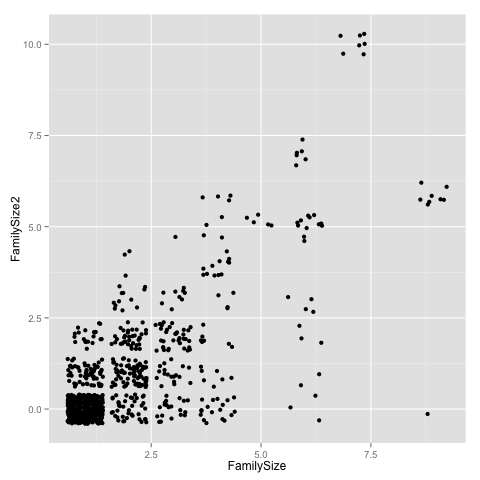

In [59]:
%%R

ggplot(df %>% mutate(FamilySize2 = SibSp + Parch), aes(FamilySize, FamilySize2)) + geom_point(position = 'jitter')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 29 columns):
PassengerId               891 non-null int64
Survived                  891 non-null int64
Pclass                    891 non-null int64
Name                      891 non-null object
Sex                       891 non-null object
Age                       714 non-null float64
SibSp                     891 non-null int64
Parch                     891 non-null int64
Ticket                    891 non-null object
Fare                      891 non-null float64
Cabin                     204 non-null object
Embarked                  889 non-null object
Gender                    891 non-null int64
LastName                  891 non-null object
FamilySize2               891 non-null int64
FamilySize                891 non-null int64
AgeFilledModel            891 non-null float64
AgeFilledModel*Class      891 non-null float64
AgeOriginallyNaN          891 non-null int64
Male3                     

(-0.1, 1.1)

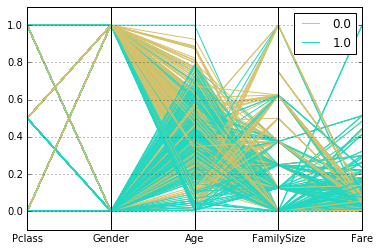

In [60]:
from pandas.tools.plotting import parallel_coordinates
df.info()
parallel_coordinates(df[['Survived', 'Pclass', 'Gender', 'Age', 'FamilySize', 'Fare']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))), 'Survived')
plt.ylim((-0.1, 1.1))

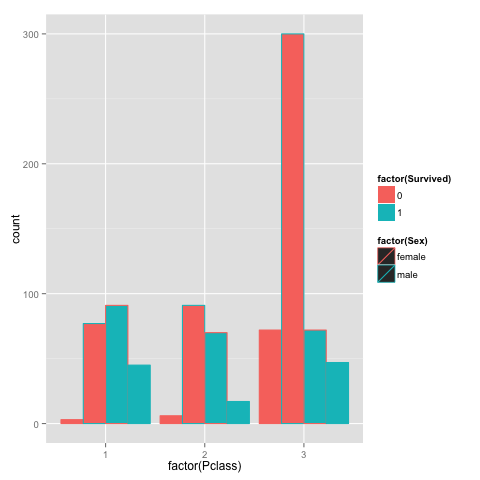

In [61]:
%%R
ggplot(df, aes(factor(Pclass), fill=factor(Survived), colour=factor(Sex))) +  geom_bar(position = "dodge")

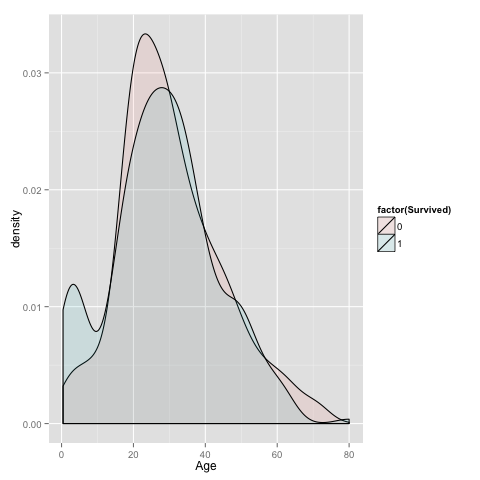

In [62]:
%%R
ggplot(df, aes(Age, fill = factor(Survived))) + geom_density(alpha=.1)

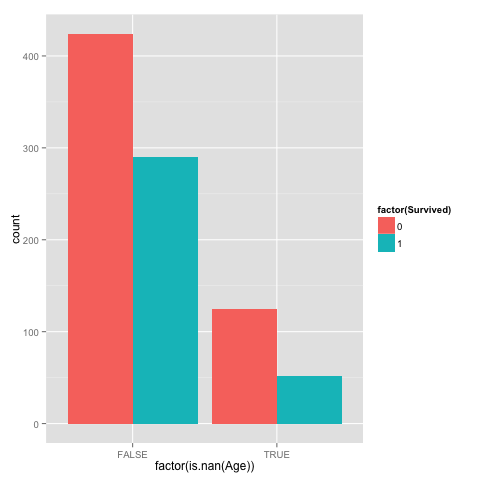

In [63]:
%%R
ggplot(df, aes(factor(is.nan(Age)), fill = factor(Survived))) + geom_bar(position = "dodge")

## Title
Title correlates with age (Master => child, Dr, Rev => Adult, Miss => young woman, Mr, Mrs => middleAged)

In [64]:
df['Title'].unique()

array([ 0,  6,  9, 12, 14,  1,  2,  3,  4,  5, 10, 15,  7,  8, 11, 13])

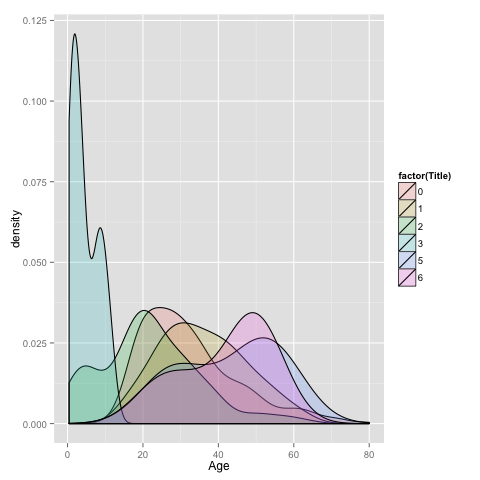

In [65]:
%%R
ggplot(df, aes(Age, fill = factor(Title))) + geom_density(alpha=.2)

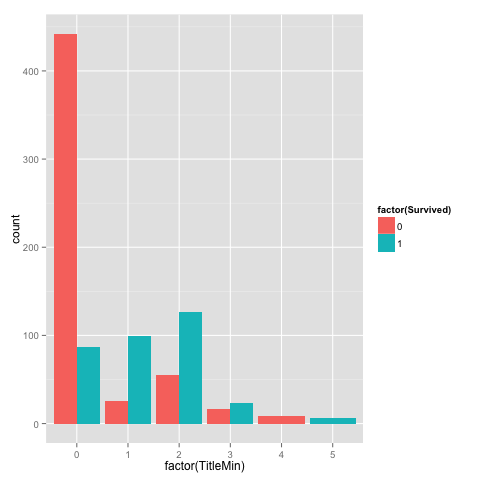

In [66]:
%%R
ggplot(df, aes(factor(TitleMin), fill = factor(Survived))) + geom_bar(position = "dodge")

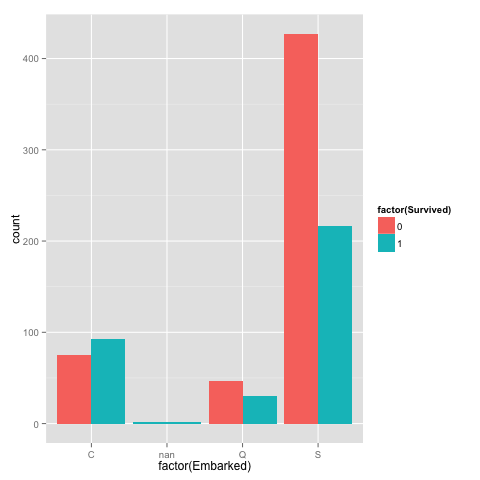

In [67]:
%%R
ggplot(df, aes(factor(Embarked), fill = factor(Survived))) + geom_bar(position = "dodge")

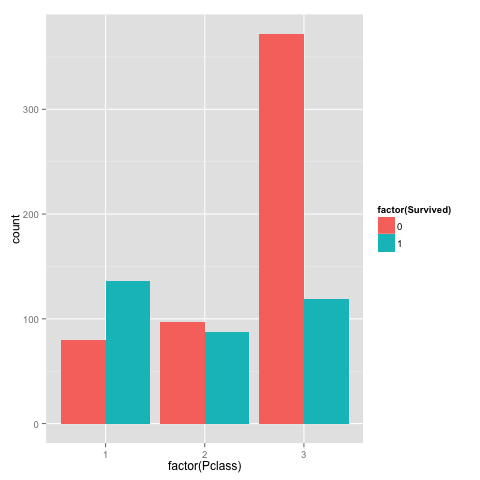

In [68]:
%%R
ggplot(df, aes(factor(Pclass), fill = factor(Survived))) + geom_bar(position = "dodge")

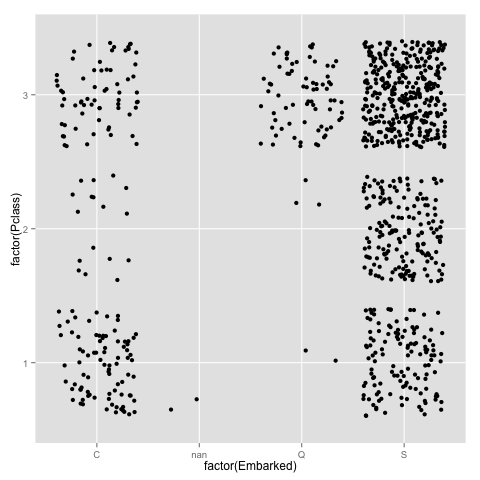

In [69]:
%%R
ggplot(df, aes(factor(Embarked), factor(Pclass))) + geom_point(position = "jitter")

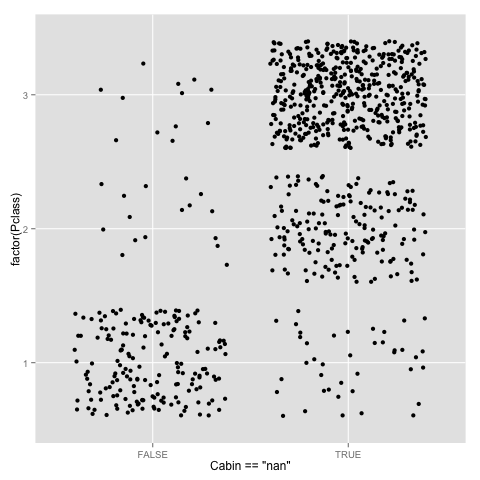

In [89]:
%%R
df %>% transmute(C = Cabin == 'nan')
#is.nan(df[6,'Cabin'])
ggplot(df, aes(Cabin == 'nan', factor(Pclass))) + geom_point(position="jitter")

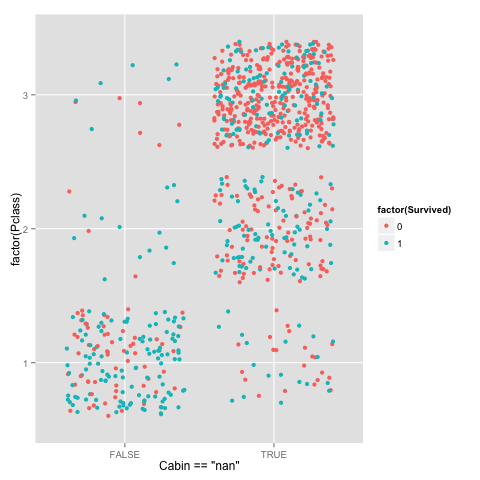

In [91]:
%%R
ggplot(df, aes(Cabin == 'nan', factor(Pclass), colour=factor(Survived))) + geom_point(position="jitter")

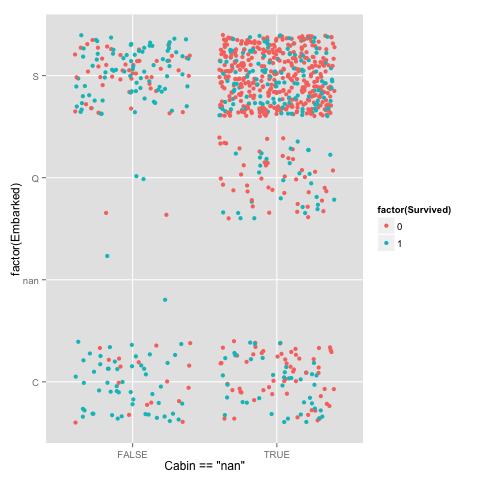

In [100]:
%%R
ggplot(df, aes(Cabin == 'nan', factor(Embarked), colour=factor(Survived))) + geom_point(position="jitter")

In [ ]:
%%R
ggplot(df, aes(Cabin == 'nan', factor(Pclass))) + geom_point(position="jitter")

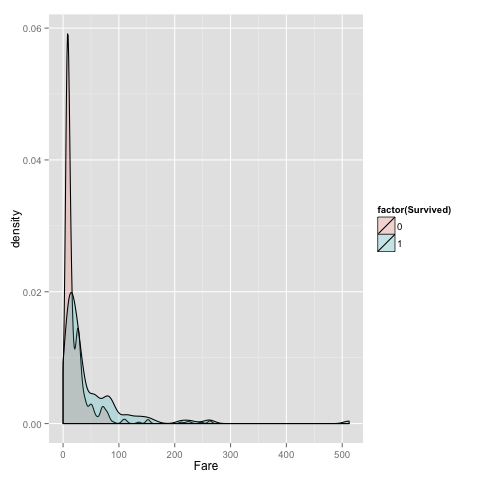

In [42]:
%%R
ggplot(df, aes(Fare, fill = factor(Survived))) + geom_density(alpha=.2)